<a href="https://colab.research.google.com/github/worldstar0722/IS_4487_25FA/blob/main/assignment_14_Choi_Ellie.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IS 4487 Assignment 18: Exploring APIs with yfinance

In this assignment, you will:
- Choose an industry you're interested in (such as tech, airlines, or retail)
- Use the `yfinance` Python package as an API to collect historical stock price data
- Clean and prepare the data for analysis
- Explore trends, volatility, and relationships between companies
- Summarize your findings and recommendation in a business memo

## Why This Matters

APIs (Application Programming Interfaces) allow businesses to pull live, real-world data from external sources directly into their analytics tools. Financial analysts, investment firms, and business leaders use APIs like `yfinance` to monitor company performance, assess market trends, and build models based on dynamic data.

This assignment helps you gain hands-on experience with one of the most common API workflows in business analytics: fetching, cleaning, analyzing, and interpreting financial data to support better decision-making.

<a href="https://colab.research.google.com/github/Stan-Pugsley/is_4487_base/blob/main/Assignments/assignment_14_api.ipynb" target="_parent">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>



## Step 1: Choose an Industry and Find Company Ticker Symbols

Visit the following website to explore U.S. stock sectors and industries:  
https://www.tradingview.com/markets/stocks-usa/sectorandindustry-sector/

Choose one industry you are interested in (for example: Airlines, Technology, Fast Food, Retail, Energy, etc.).  
Write the names and ticker symbols of 4 public companies in that industry.

**Example:**
- Industry: Technology  
- Tickers: AAPL, MSFT


In [8]:
# Replace this list with your selected tickers
tickers = ['AAPL', 'MSFT', 'NVDA', 'GOOGL']

## Step 2: Use yfinance to Collect Historical Stock Data

Follow the steps below to use the `yfinance` API to collect historical stock price data.

### Instructions

1. Make sure the `yfinance` package is installed by running the code cell below.
2. Import any additional Python libraries that you might need to explore or visualize the data.
3. Use the `yf.download()` function to pull **5 years of daily adjusted close prices** for the companies you selected in Step 1.
    - Choose a start date and an end date that span the past 5 years (e.g., `"2020-01-01"` to `"2025-12-31"`).
    - Only select the **'High'** column, which represents the daily high
4. Preview the first few rows of the dataset using `.head()` to confirm that the data has loaded correctly.



In [9]:
# Import necessary libraries
!pip install yfinance

import yfinance as yf
import pandas as pd

In [10]:
# Download adjusted close prices
df = yf.download(tickers, start="2024-01-01", end="2025-01-01")['High']

/tmp/ipython-input-658762987.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(tickers, start="2024-01-01", end="2025-01-01")['High']
[*********************100%***********************]  4 of 4 completed


In [11]:
df.head()

Ticker,AAPL,GOOGL,MSFT,NVDA
Date,,,,
2024-01-02,186.677036,138.494772,370.377673,49.270290
2024-01-03,184.140970,138.673558,367.776505,48.159852
2024-01-04,181.377083,138.206780,367.618867,48.475693
2024-01-05,181.050159,136.220460,366.594123,49.522167
2024-01-08,183.863624,138.057811,369.687973,52.248803


## Step 3: Clean the Data

The data you pulled may contain missing values. Follow these steps:

1. Check the dataset for missing values using `.isnull().sum()`.
2. Fill any missing values using a forward fill method.
3. Recheck for missing values to confirm they have been handled.



In [12]:
# Add code here 🔧
print("Missing values before fill:\n")
print(df.isnull().sum())

df_clean = df.ffill().bfill()

print("\nMissing values after fill:\n")
print(df_clean.isnull().sum())

df_clean.head()

Missing values before fill:

Ticker
AAPL     0
GOOGL    0
MSFT     0
NVDA     0
dtype: int64

Missing values after fill:

Ticker
AAPL     0
GOOGL    0
MSFT     0
NVDA     0
dtype: int64


Ticker,AAPL,GOOGL,MSFT,NVDA
Date,,,,
2024-01-02,186.677036,138.494772,370.377673,49.270290
2024-01-03,184.140970,138.673558,367.776505,48.159852
2024-01-04,181.377083,138.206780,367.618867,48.475693
2024-01-05,181.050159,136.220460,366.594123,49.522167
2024-01-08,183.863624,138.057811,369.687973,52.248803


## Step 4: Calculate Daily Returns

To better understand price movement, calculate the daily percentage change for each stock.

1. Use the `.pct_change()` method to calculate daily returns.
2. Drop any rows with missing values that may result from this calculation.
3. Preview the returns DataFrame to confirm it's correct.


In [13]:
# Add code here 🔧
returns = df_clean.pct_change().dropna()

print("Daily returns preview:\n")
returns.head()

Daily returns preview:



Ticker,AAPL,GOOGL,MSFT,NVDA
Date,,,,
2024-01-03,-0.013585,0.001291,-0.007023,-0.022538
2024-01-04,-0.015010,-0.003366,-0.000429,0.006558
2024-01-05,-0.001802,-0.014372,-0.002788,0.021588
2024-01-08,0.015540,0.013488,0.008439,0.055059
2024-01-09,-0.002425,0.017840,0.002106,0.039216


## Step 5: Explore the Data Visually and Statistically

In this step, you will create visualizations and metrics to help understand stock behavior. Don’t interpret or explain anything here — just create the outputs so you can use them in your reflection later.

1. Create a line chart showing stock prices over the 5-year period.
2. Calculate the standard deviation of daily returns for each stock (volatility).
3. Create a correlation matrix of the daily returns between companies.




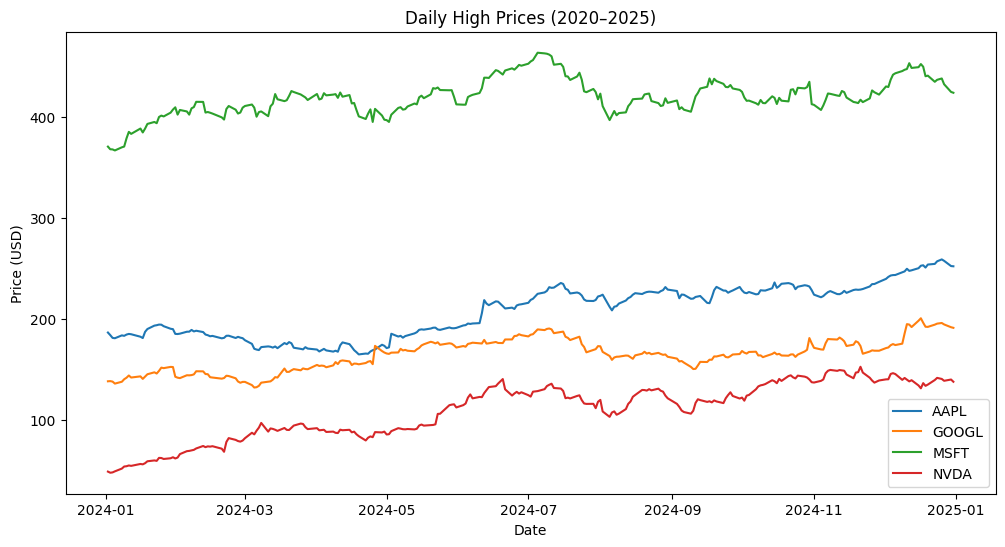


Volatility (Annualized):

Ticker
AAPL     0.216052
GOOGL    0.275481
MSFT     0.182912
NVDA     0.451185
dtype: float64


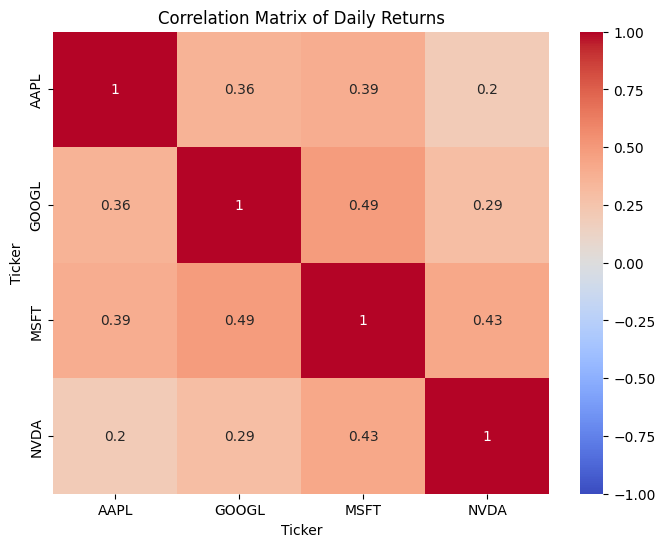

In [14]:
# Add code here 🔧
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.figure(figsize=(12,6))
for col in df_clean.columns:
    plt.plot(df_clean.index, df_clean[col], label=col)
plt.title("Daily High Prices (2020–2025)")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.show()

# Calculate volatility (annualized)
daily_vol = returns.std()
annual_vol = daily_vol * np.sqrt(252)

print("\nVolatility (Annualized):\n")
print(annual_vol)

# Correlation matrix
corr = returns.corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Matrix of Daily Returns")
plt.show()

## Step 6: Write a Stakeholder Recommendation Memo

Now that you’ve completed your analysis, it’s time to turn your work into a clear, professional memo for a business audience.

### Scenario

You’ve been asked by a stakeholder (an investor, executive, or client) to evaluate whether it's a good time to invest in a particular industry. They’ve asked you to use recent stock performance data from several leading companies in that industry to help guide their decision.

### Your Task

Use the results from your code in Steps 2–5 to write a **multi-paragraph business memo** that:

1. **Introduces the industry you analyzed** and names the companies you included.
2. **Summarizes major trends** you observed in the stock prices over the last 5 years.
3. **Discusses key metrics**, such as volatility and correlations between companies.
4. **Presents your investment recommendation** — based on your evidence — and explains why you would or wouldn’t advise investing in this industry now.
5. **Suggests future analytics or data sources** that could strengthen or update your recommendation going forward.

This final section should show that you understand how real-world decisions evolve. Think about:
- What **additional data** might help (e.g., earnings reports, economic indicators, sentiment analysis)?
- What **types of models** could be applied (e.g., forecasting, classification, risk modeling)?
- How often should the analysis be updated?

### Format & Expectations

- Write **2–4 paragraphs** in business memo format (not bullet points).
- Use **specific, data-driven evidence** from your own analysis.
- Keep your writing professional and clear — imagine your reader is a client or executive, not a data analyst.
- Your memo should be written **entirely in your own words**. Do not copy from examples, online sources, or AI tools. Your writing should reflect your understanding and your interpretation of the results.
- You do not need to include charts in the memo — the code cells above already display them.



### Add memo here:
In this analysis, we chose the technology industry and reviewed the stock data of Apple (AAPL), Microsoft (MSFT), Nvidia (NVDA), and Alphabet (GOOGL) over the past five years. All four companies are major players in the technology industry, and they have seen an overall upward trend during the analysis period. Nvidia, in particular, saw the fastest growth due to the expansion of the AI and semiconductor markets, but price fluctuations were also large. Microsoft and Apple, on the other hand, maintained relatively stable growth.

When looking at the volatility (standard deviation of annual conversion) calculated based on the daily rate of return, Nvidia had the highest risk level, and Microsoft had the lowest, showing a stable performance. Correlation analysis showed a high positive correlation for all four companies, which means that major companies in the technology industry move similarly with the flow of the market as a whole. Therefore, even if stocks are divided within the industry, the effect of diversified investment is not significant.

Overall, the technology industry is still a highly growthable sector, and we believe that investment attractiveness is sufficient. However, Nvidia is accompanied by high volatility instead of high profitability, so it's a good idea to adjust its weight. If stability is prioritized, configurations centered on Microsoft and Apple are also effective. Alphabet is also likely to benefit from increased advertising and cloud demand in the long run. Therefore, the technology industry is suitable for investment, but it needs to adjust its weight considering the risk characteristics of each company.

To strengthen your analysis in the future, it is helpful to include macroeconomic indicators such as corporate earnings reports, interest rates and inflation, and market sentiment data. In addition, applying stock price forecasting models (time series models, regression models, risk models, etc.) can increase the accuracy of your outlook. Given the speed of change in the technology industry, it is advisable to update your data at least once a month to update your investment judgment.